In [50]:
import vpython as vp
import numpy as np
import math as mp

import vpythonExtPrims as vpep
import vpythonCamera as vpc
import vpythonDemonCore as vpdc

import matplotlib.pyplot as plt

In [51]:
def addNoise(signal, mag):
    num = len(signal)
    noise = 2 * mag * (np.random.random(num) - 0.5)
    return(np.add(signal, noise))

def wiggler(a, tf, num):
    x = np.linspace(0, tf, num = num)
    return(np.add((a / (2 * np.pi)) * np.cos((2 * np.pi * x) + (np.pi / 2)), x))

def normedWiggler(a, tf, num):
    wiggy = wiggler(a, tf, num)
    return(wiggy / max(wiggy))

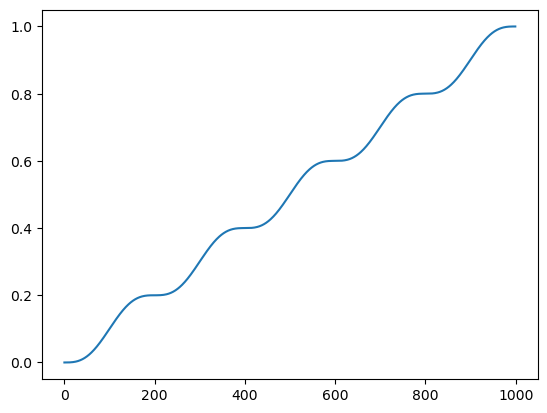

In [56]:
plt.plot(normedWiggler(1, 5, 1000))

In [57]:
class scence_surroundingClosingCore:
    def __init__(self, hdes):
        self.scene = vpep.generateScene(hdes)
        self.scene.ambient = vpc.ambientLinCom(0.25, 0, colorVector = vp.vector(0, 0, 0))

        self.framer = vpc.globalFrames()

        self.demonCore = vpdc.demonCoreExp(center = vp.vector(0, 5, 0))

        self.canyon = vpdc.canyonWalls(100)
        
    def animate(self, filmy):
        dt = 1/24
        nump = int(5 / dt)

        theta = 2 * vp.pi * normedWiggler(1, 5, nump)#np.power(np.linspace(0, 1, num = nump), 2.5)

        tilt = vp.pi / 10
        angleOrigin = self.demonCore.toggleCoreScrewdriver(tilt, 0, 1, not True, None, None)

        self.scene.ambient = vpc.ambientLinCom(0.25, 0, colorVector = vp.vector(0, 0, 0))

        posCen = vp.vector(0, 0, 0)
        posCen.x = self.demonCore.base.pos.x
        posCen.y = self.demonCore.base.pos.y + 0.2
        posCen.z = self.demonCore.base.pos.z

        pathx = (1 * np.array(list(map(np.sin, theta))) + posCen.x)
        pathy = (1 * np.array(list(map(np.sin, theta))) + posCen.y)
        pathz = (1 * np.array(list(map(np.cos, theta))) + posCen.z)

        path = vpc.pathVectorize(pathx, pathy, pathz)

        ranger = 3
        vpc.moveFixedCamera(self.scene, path, posCen, dt, ranger, filming = filmy, framer = self.framer)
        
        if(filmy):
            vpc.stillShot(self.scene, 24, self.framer)
        
        self.demonCore.toggleCoreScrewdriver(-tilt, dt, int(0.2 / dt), film = filmy, framer = self.framer, scene = self.scene)

        self.scene.ambient = vpc.ambientLinCom(0.25, 0.4, colorVector = vp.vector(0, 1, 1))

        if(filmy):
            vpc.stillShot(self.scene, 12, self.framer)

In [58]:
scene = scence_surroundingClosingCore(1000)
scene.animate(not True)

<IPython.core.display.Javascript object>